In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [365]:
df = pd.read_csv('student_data.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


In [366]:
#Lets check the shape of the column
df.shape

(395, 31)

In [367]:
#Lets check the datatypes
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [368]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [369]:
#Lets check null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [370]:
#Lets check some value counts
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [371]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [372]:
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [373]:
df['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [374]:
df.drop(['Mjob','Fjob','reason','guardian'],axis=1,inplace=True)

In [375]:
df['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [376]:
df['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [377]:
df['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [378]:
df['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [379]:
df['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [380]:
df['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [381]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [382]:
df['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [383]:
school = pd.get_dummies(df['school'],drop_first=True)

In [384]:
address = pd.get_dummies(df['address'],drop_first=True)

In [385]:
famsize = pd.get_dummies(df['famsize'],drop_first=True)

In [386]:
Pstatus = pd.get_dummies(df['Pstatus'],drop_first=True)

In [387]:
df.drop(['school','address','famsize','Pstatus'],axis=1,inplace=True)

In [388]:
df = pd.concat([df,school,address,famsize,Pstatus],axis=1)

In [389]:
df.head(10)

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,goout,Dalc,Walc,health,absences,passed,MS,U,LE3,T
0,F,18,4,4,2,2,0,yes,no,no,...,4,1,1,3,6,no,0,1,0,0
1,F,17,1,1,1,2,0,no,yes,no,...,3,1,1,3,4,no,0,1,0,1
2,F,15,1,1,1,2,3,yes,no,yes,...,2,2,3,3,10,yes,0,1,1,1
3,F,15,4,2,1,3,0,no,yes,yes,...,2,1,1,5,2,yes,0,1,0,1
4,F,16,3,3,1,2,0,no,yes,yes,...,2,1,2,5,4,yes,0,1,0,1
5,M,16,4,3,1,2,0,no,yes,yes,...,2,1,2,5,10,yes,0,1,1,1
6,M,16,2,2,1,2,0,no,no,no,...,4,1,1,3,0,yes,0,1,1,1
7,F,17,4,4,2,2,0,yes,yes,no,...,4,1,1,1,6,no,0,1,0,0
8,M,15,3,2,1,2,0,no,yes,yes,...,2,1,1,1,0,yes,0,1,1,0
9,M,15,3,4,1,2,0,no,yes,yes,...,1,1,1,5,0,yes,0,1,0,1


In [390]:
sex = pd.get_dummies(df['sex'],drop_first=True)

In [391]:
df.drop(['sex'],axis=1,inplace=True)

In [392]:
df = pd.concat([df,sex],axis=1)

In [393]:
df.head(15)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Dalc,Walc,health,absences,passed,MS,U,LE3,T,M
0,18,4,4,2,2,0,yes,no,no,no,...,1,1,3,6,no,0,1,0,0,0
1,17,1,1,1,2,0,no,yes,no,no,...,1,1,3,4,no,0,1,0,1,0
2,15,1,1,1,2,3,yes,no,yes,no,...,2,3,3,10,yes,0,1,1,1,0
3,15,4,2,1,3,0,no,yes,yes,yes,...,1,1,5,2,yes,0,1,0,1,0
4,16,3,3,1,2,0,no,yes,yes,no,...,1,2,5,4,yes,0,1,0,1,0
5,16,4,3,1,2,0,no,yes,yes,yes,...,1,2,5,10,yes,0,1,1,1,1
6,16,2,2,1,2,0,no,no,no,no,...,1,1,3,0,yes,0,1,1,1,1
7,17,4,4,2,2,0,yes,yes,no,no,...,1,1,1,6,no,0,1,0,0,0
8,15,3,2,1,2,0,no,yes,yes,no,...,1,1,1,0,yes,0,1,1,0,1
9,15,3,4,1,2,0,no,yes,yes,yes,...,1,1,5,0,yes,0,1,0,1,1


In [394]:
#Lets convert all the categorical column
df['schoolsup'] = df['schoolsup'].replace("yes",1)

In [395]:
df['schoolsup'] = df['schoolsup'].replace("no",0)

In [396]:
df['famsup'] = df['famsup'].replace("yes",1)

In [397]:
df['famsup'] = df['famsup'].replace("no",0)

In [398]:
df['paid'] = df['paid'].replace("yes",1)

In [399]:
df['paid'] = df['paid'].replace("no",1)

In [400]:
df['activities'] = df['activities'].replace("yes",1)

In [401]:
df['activities'] = df['activities'].replace("no",0)

In [402]:
df['nursery'] = df['nursery'].replace("yes",1)

In [403]:
df['nursery'] = df['nursery'].replace("no",0)

In [404]:
df['higher'] = df['higher'].replace("yes",1)

In [405]:
df['higher'] = df['higher'].replace("no",0)

In [406]:
df['internet'] = df['internet'].replace("yes",1)

In [407]:
df['internet'] = df['internet'].replace("no",0)

In [408]:
df['romantic'] = df['romantic'].replace("yes",1)

In [409]:
df['romantic'] = df['romantic'].replace("no",0)

In [410]:
df.head(15)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Dalc,Walc,health,absences,passed,MS,U,LE3,T,M
0,18,4,4,2,2,0,1,0,1,0,...,1,1,3,6,no,0,1,0,0,0
1,17,1,1,1,2,0,0,1,1,0,...,1,1,3,4,no,0,1,0,1,0
2,15,1,1,1,2,3,1,0,1,0,...,2,3,3,10,yes,0,1,1,1,0
3,15,4,2,1,3,0,0,1,1,1,...,1,1,5,2,yes,0,1,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,2,5,4,yes,0,1,0,1,0
5,16,4,3,1,2,0,0,1,1,1,...,1,2,5,10,yes,0,1,1,1,1
6,16,2,2,1,2,0,0,0,1,0,...,1,1,3,0,yes,0,1,1,1,1
7,17,4,4,2,2,0,1,1,1,0,...,1,1,1,6,no,0,1,0,0,0
8,15,3,2,1,2,0,0,1,1,0,...,1,1,1,0,yes,0,1,1,0,1
9,15,3,4,1,2,0,0,1,1,1,...,1,1,5,0,yes,0,1,0,1,1


In [411]:
df['passed'] = df['passed'].replace("yes",1)

In [412]:
df['passed'] = df['passed'].replace("no",0)

In [413]:
#Lets again final check with the datatypes
df.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
passed        int64
MS            uint8
U             uint8
LE3           uint8
T             uint8
M             uint8
dtype: object

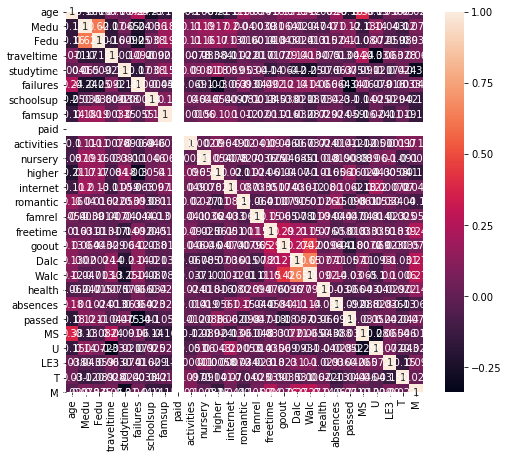

In [414]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

In [415]:
#Lets again check any null values in paid column
df['paid'].isnull().sum()

0

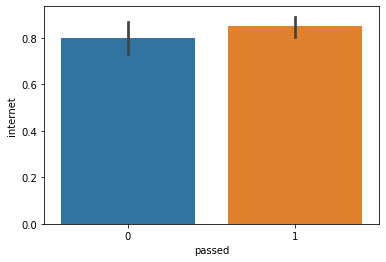

In [416]:
#Lets check how many passed and failed students have the internet
sns.barplot(x='passed',y='internet',data=df)
plt.show()

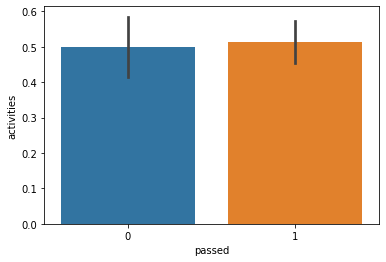

In [417]:
#Lets check how many passed and failed students take a part in a activities
sns.barplot(x='passed',y='activities',data=df)
plt.show()

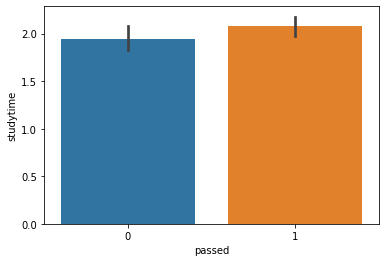

In [418]:
#Lets check how many passed and failed students gives studytime 
sns.barplot(x='passed',y='studytime',data=df)
plt.show()

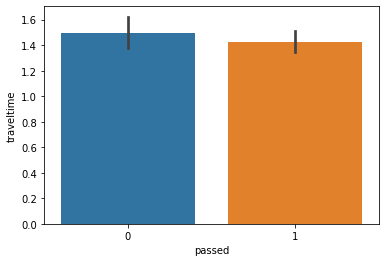

In [419]:
#Lets check how many passed and failed students have traveltime
sns.barplot(x='passed',y='traveltime',data=df)
plt.show()

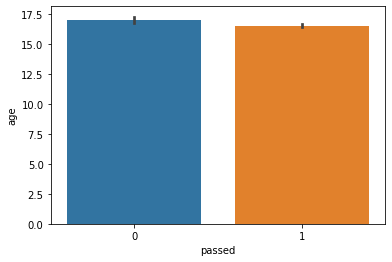

In [420]:
#Lets check how many passed and failed students have age bar
sns.barplot(x='passed',y='age',data=df)
plt.show()

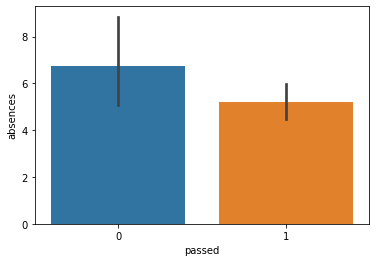

In [421]:
#Lets check how many passed and failed students have absentism
sns.barplot(x='passed',y='absences',data=df)
plt.show()

In [422]:
#lets separate x and y
x = df.drop(columns=["passed"],axis=1)
y = df[["passed"]]

In [423]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [424]:
print(x_train.shape,x_test.shape)

(276, 26) (119, 26)


In [425]:
print(y_train.shape,y_test.shape)

(276, 1) (119, 1)


In [426]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(395, 27)
(0, 27)


In [427]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [428]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [429]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [430]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.6302521008403361


cross_val_score =  0.6658333333333334


roc_auc_curve 0.5699821322215605


classification_report               precision    recall  f1-score   support

           0       0.54      0.30      0.39        46
           1       0.66      0.84      0.73        73

    accuracy                           0.63       119
   macro avg       0.60      0.57      0.56       119
weighted avg       0.61      0.63      0.60       119



[[14 32]
 [12 61]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ke

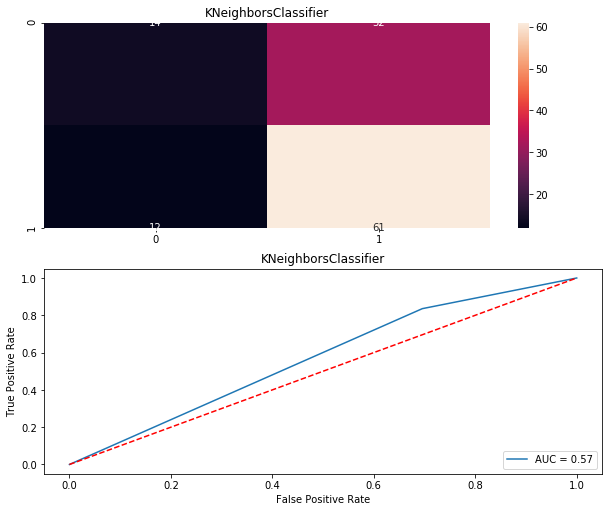

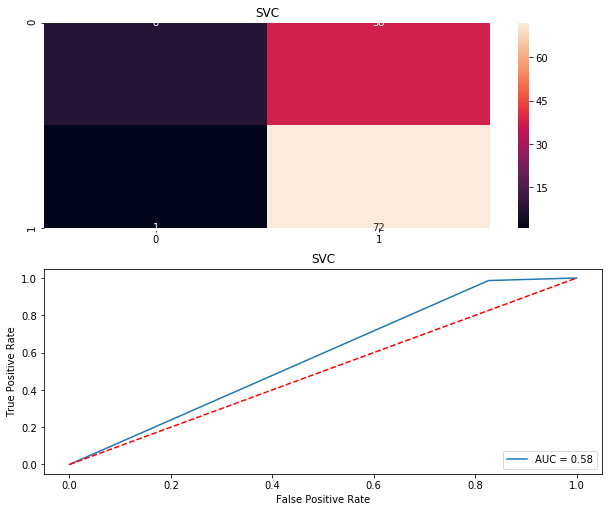

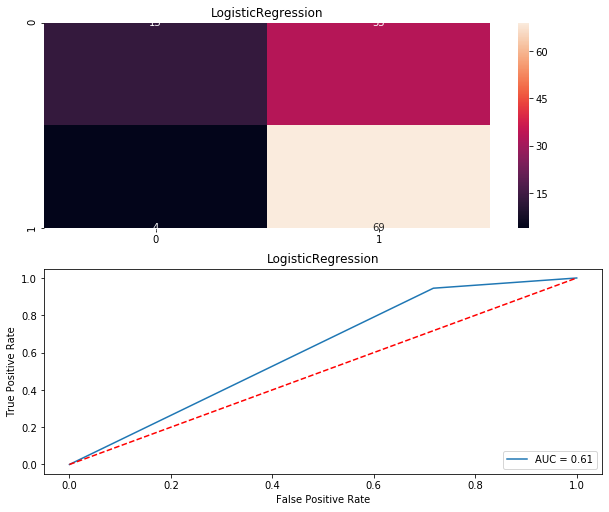

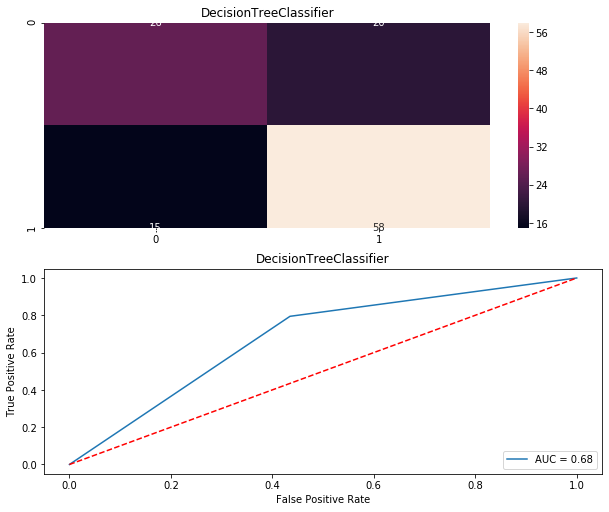

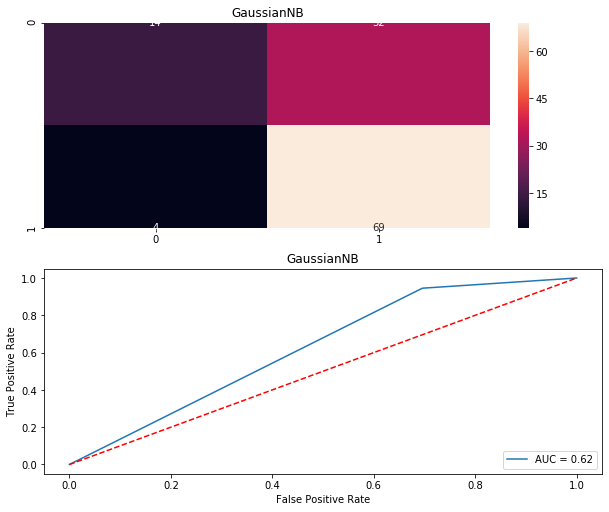

In [431]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [432]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,63.025210,66.583333,56.998213
1,SVC,67.226891,69.102564,58.010721
2,LogisticRegression,68.907563,67.839744,61.390709
3,DecisionTreeClassifier,70.588235,62.243590,67.986897
4,GaussianNB,69.747899,66.519231,62.477665


In [433]:
#As by training the all the models still we can't able to achieve a great accuracy score so we will go ahead with PCA method
#And try to increase the model accuracy

In [434]:
df.head(15)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Dalc,Walc,health,absences,passed,MS,U,LE3,T,M
0,18,4,4,2,2,0,1,0,1,0,...,1,1,3,6,0,0,1,0,0,0
1,17,1,1,1,2,0,0,1,1,0,...,1,1,3,4,0,0,1,0,1,0
2,15,1,1,1,2,3,1,0,1,0,...,2,3,3,10,1,0,1,1,1,0
3,15,4,2,1,3,0,0,1,1,1,...,1,1,5,2,1,0,1,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,2,5,4,1,0,1,0,1,0
5,16,4,3,1,2,0,0,1,1,1,...,1,2,5,10,1,0,1,1,1,1
6,16,2,2,1,2,0,0,0,1,0,...,1,1,3,0,1,0,1,1,1,1
7,17,4,4,2,2,0,1,1,1,0,...,1,1,1,6,0,0,1,0,0,0
8,15,3,2,1,2,0,0,1,1,0,...,1,1,1,0,1,0,1,1,0,1
9,15,3,4,1,2,0,0,1,1,1,...,1,1,5,0,1,0,1,0,1,1


In [435]:
from sklearn.decomposition import PCA

In [436]:
#lets separate x and y again
x = df.drop(columns=["passed"],axis=1)
y = df[["passed"]]

In [437]:
x.shape

(395, 26)

In [438]:
pca = PCA(n_components=24)

In [439]:
x = pca.fit_transform(x)

In [440]:
x.shape

(395, 24)

In [441]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [442]:
print(x_train.shape,x_test.shape)

(276, 24) (119, 24)


In [443]:
print(y_train.shape,y_test.shape)

(276, 1) (119, 1)


In [444]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=2)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=2)
GNB = GaussianNB()

In [445]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


Accuracy Score 0.6302521008403361


cross_val_score =  0.5820512820512821


roc_auc_curve 0.6302858844550328


classification_report               precision    recall  f1-score   support

           0       0.52      0.63      0.57        46
           1       0.73      0.63      0.68        73

    accuracy                           0.63       119
   macro avg       0.62      0.63      0.62       119
weighted avg       0.65      0.63      0.63       119



[[29 17]
 [27 46]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ke

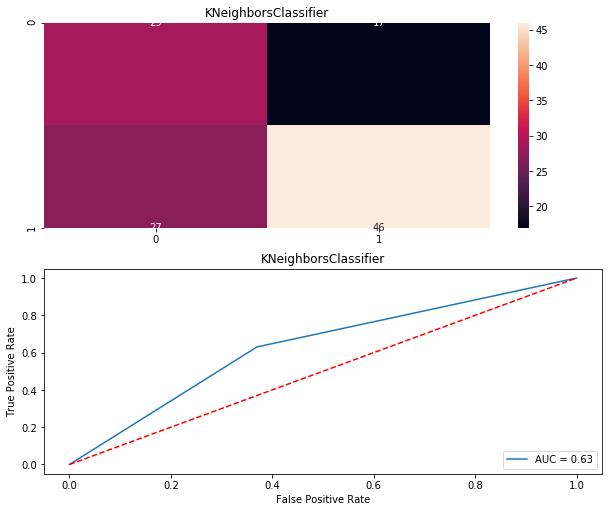

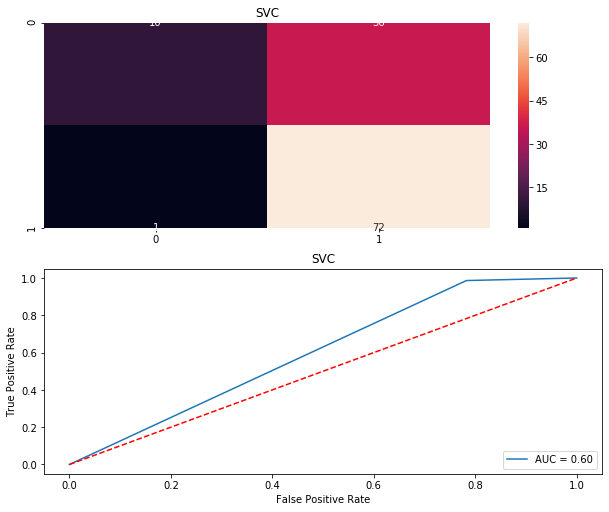

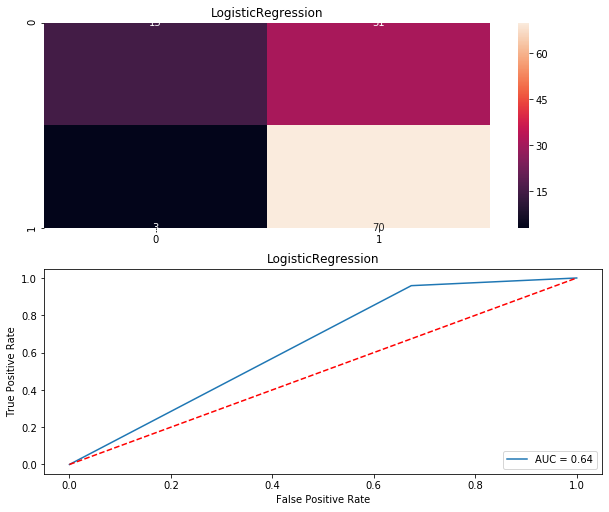

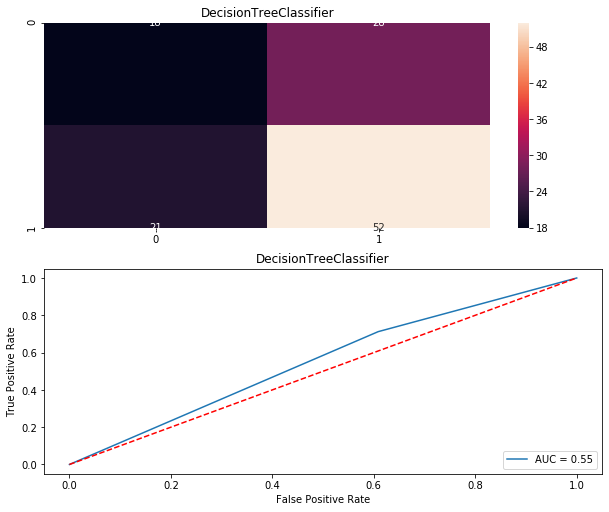

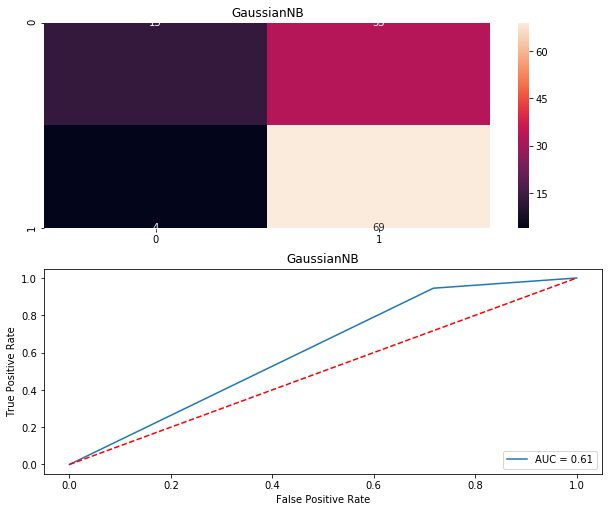

In [446]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [447]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,63.025210,58.205128,63.028588
1,SVC,68.907563,69.865385,60.184634
2,LogisticRegression,71.428571,69.878205,64.249553
3,DecisionTreeClassifier,58.823529,59.685897,55.181656
4,GaussianNB,68.907563,68.333333,61.390709


In [448]:
#After running multiple times by changing the value of n_components in pca we can select Logistic Regression model

In [449]:
from sklearn.externals import joblib

In [451]:
joblib.dump(LR , 'model_student_data.pkl')

['model_student_data.pkl']

In [452]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)